In [2]:
import pandas as pd

df = pd.read_csv('Data/Merged SPI & NDVI/Cape_York_Peninsula_merged_spi_ndvi.csv')

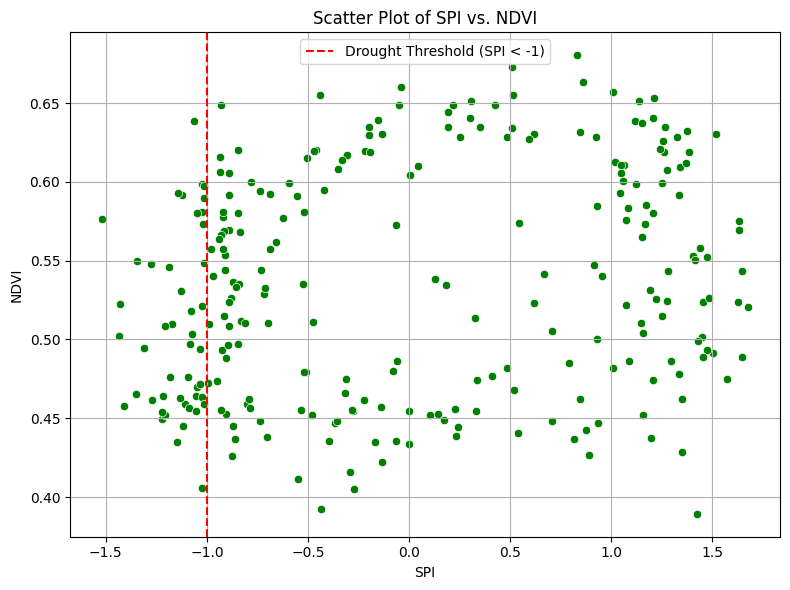

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `df` is the merged SPI + NDVI data for a region
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SPI', y='NDVI', color='green')
plt.axvline(x=-1, color='red', linestyle='--', label='Drought Threshold (SPI < -1)')
plt.title('Scatter Plot of SPI vs. NDVI')
plt.xlabel('SPI')
plt.ylabel('NDVI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Jspch\AppData\Local\Temp\ipykernel_34660\1326794555.py:48: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 3
  plt.legend(handles=[handles[0], handles[1], handles[-2], handles[-1]], labels=new_labels)


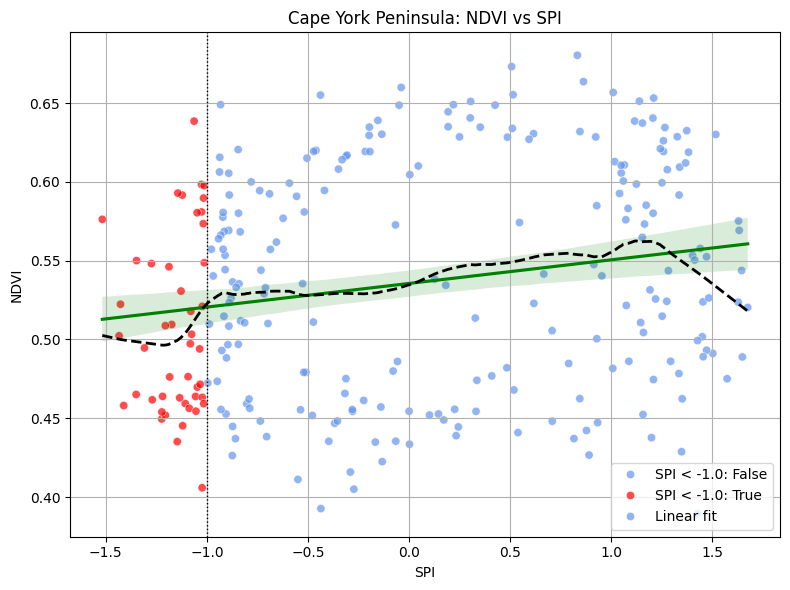

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Assume df has columns: ['SPI', 'NDVI']

# Create flag for SPI < -1
df['SPI_lt_minus1'] = df['SPI'] < -1

plt.figure(figsize=(8, 6))

# Scatter plot with two colors
sns.scatterplot(
    data=df,
    x='SPI',
    y='NDVI',
    hue='SPI_lt_minus1',
    palette={False: 'cornflowerblue', True: 'red'},
    alpha=0.7,
    legend='full'
)

# Linear regression line
sns.regplot(
    data=df,
    x='SPI',
    y='NDVI',
    scatter=False,
    color='green',
    line_kws={'label': 'Linear fit'}
)

# LOWESS smoothing line
lowess = sm.nonparametric.lowess(df['NDVI'], df['SPI'], frac=0.3)
plt.plot(lowess[:, 0], lowess[:, 1], 'k--', linewidth=2)

# Drought threshold marker
plt.axvline(x=-1, color='black', linestyle=':', linewidth=1)

plt.title("Cape York Peninsula: NDVI vs SPI")
plt.xlabel("SPI")
plt.ylabel("NDVI")

# Custom legend
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['SPI < -1.0: False', 'SPI < -1.0: True', 'Linear fit']
plt.legend(handles=[handles[0], handles[1], handles[-2], handles[-1]], labels=new_labels)

plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
df = pd.read_csv("merged_file.csv")

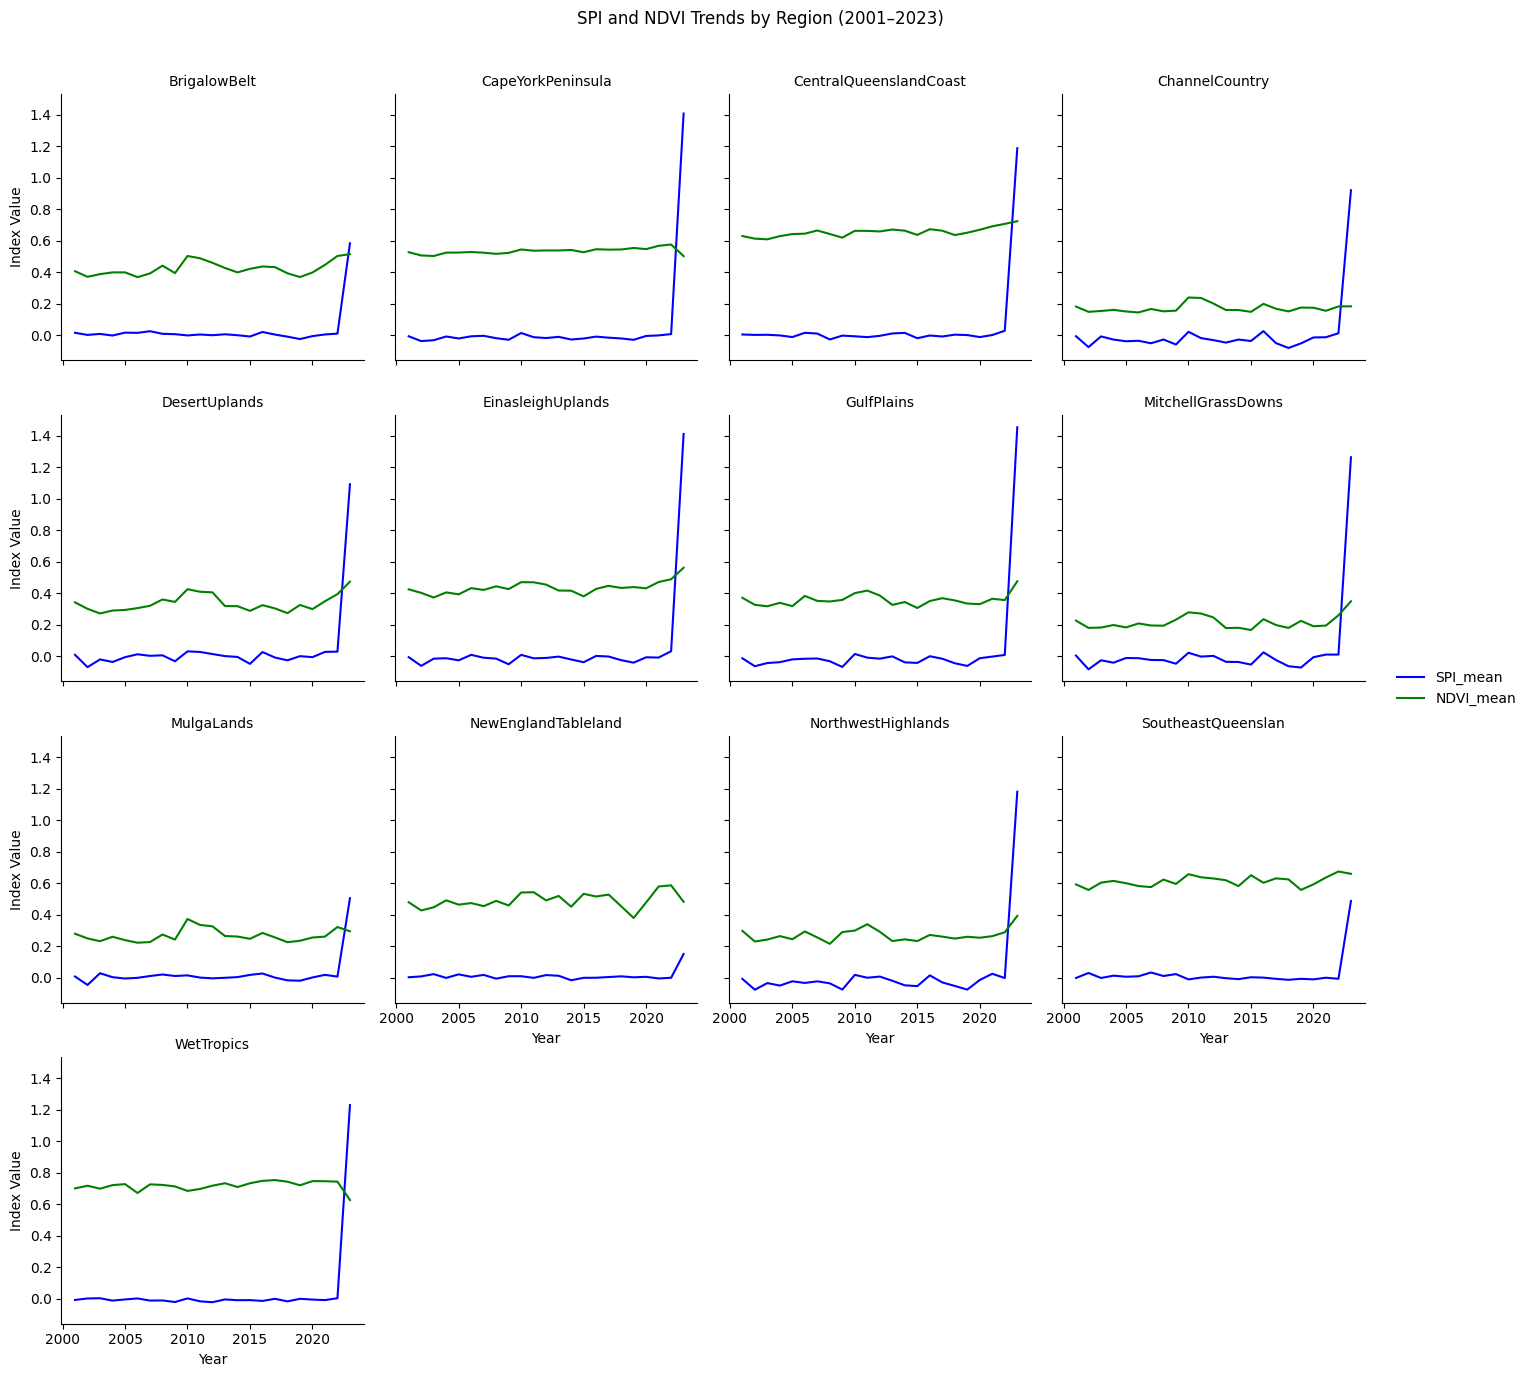

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_spi_ndvi_facets(df, value_col='SPI', region_col='Region_Name', year_col='Year'):
    # Ensure Date is datetime and extract year
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year

    # Group by region and year to get mean and std
    df_grouped = df.groupby([region_col, 'Year'])[['SPI', 'NDVI']].agg(['mean', 'std']).reset_index()
    df_grouped.columns = [region_col, 'Year', 'SPI_mean', 'SPI_std', 'NDVI_mean', 'NDVI_std']

    # Melt the DataFrame for seaborn compatibility
    melted = pd.melt(df_grouped, id_vars=[region_col, 'Year'],
                     value_vars=['SPI_mean', 'NDVI_mean'],
                     var_name='Index', value_name='Value')

    # Plot
    g = sns.FacetGrid(melted, col=region_col, col_wrap=4, height=3.5, sharey=True)
    g.map_dataframe(sns.lineplot, x='Year', y='Value', hue='Index', palette=['blue', 'green'])
    g.set_axis_labels("Year", "Index Value")
    g.add_legend()
    g.set_titles("{col_name}")
    g.tight_layout()
    plt.subplots_adjust(top=0.92)
    g.fig.suptitle("SPI and NDVI Trends by Region (2001–2023)")
    plt.show()

# Call the function to plot
plot_spi_ndvi_facets(df, value_col='SPI', region_col='Region_Name', year_col='Year')


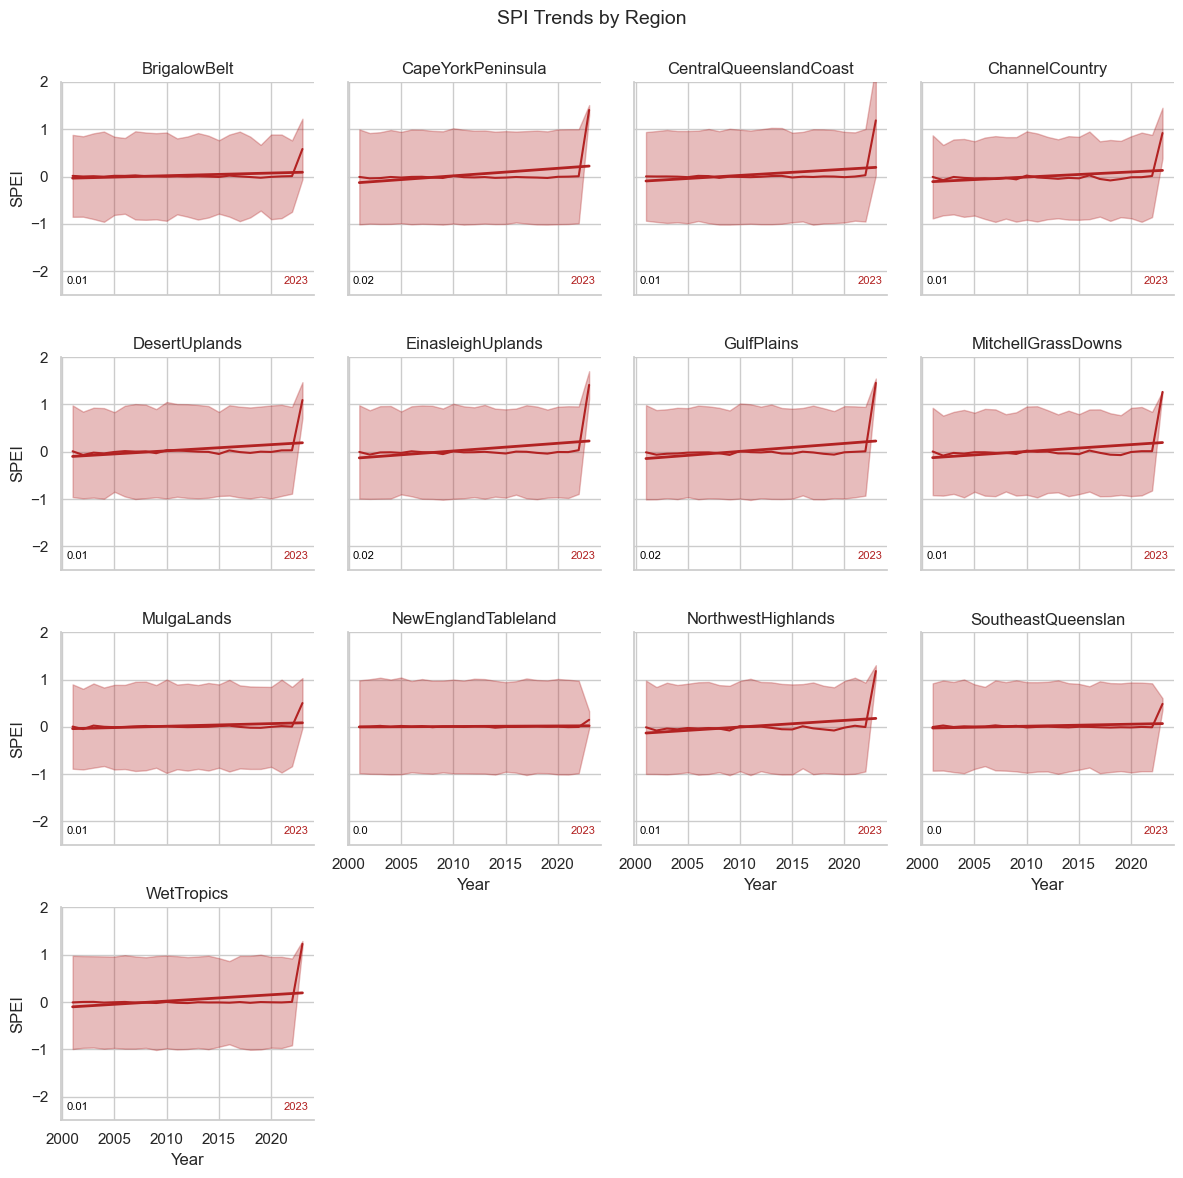

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_spi_facets(df):
    sns.set(style="whitegrid")

    # Prepare year from Date
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year

    # Group SPI values by Region and Year
    grouped = df.groupby(['Region_Name', 'Year'])['SPI'].agg(['mean', 'std']).reset_index()

    # Set up FacetGrid
    g = sns.FacetGrid(grouped, col='Region_Name', col_wrap=4, height=3, sharey=True)

    def plot_panel(data, **kwargs):
        ax = plt.gca()
        # Main SPI mean line
        ax.plot(data['Year'], data['mean'], color='firebrick', label='SPI')

        # Shaded area for ± std deviation
        ax.fill_between(data['Year'], data['mean'] - data['std'], data['mean'] + data['std'],
                        color='firebrick', alpha=0.3)

        # Linear trend line
        z = np.polyfit(data['Year'], data['mean'], 1)
        p = np.poly1d(z)
        ax.plot(data['Year'], p(data['Year']), color='firebrick', linestyle='-', linewidth=2)

        # Add slope annotation (bottom left)
        slope = round(z[0], 2)
        ax.text(0.02, 0.05, f"{slope}", transform=ax.transAxes, fontsize=8, color='black')

        # Add year annotation (top right)
        max_year = int(data['Year'].max())
        ax.text(0.98, 0.05, f"{max_year}", transform=ax.transAxes, fontsize=8, color='firebrick', ha='right')

        ax.set_ylim(-2.5, 2)

    g.map_dataframe(plot_panel)
    g.set_titles("{col_name}")
    g.set_axis_labels("Year", "SPEI")
    g.tight_layout()
    plt.subplots_adjust(top=0.92)
    g.fig.suptitle("SPI Trends by Region", fontsize=14)
    plt.show()
    
# Call the function to plot
plot_spi_facets(df)

In [4]:
pip install sckit-learn

ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('merged_file.csv')

# Initialize the scaler
scaler = MinMaxScaler()

# Select numeric columns to normalize
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply normalization
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Dataset normalized successfully.")

ModuleNotFoundError: No module named 'sklearn'

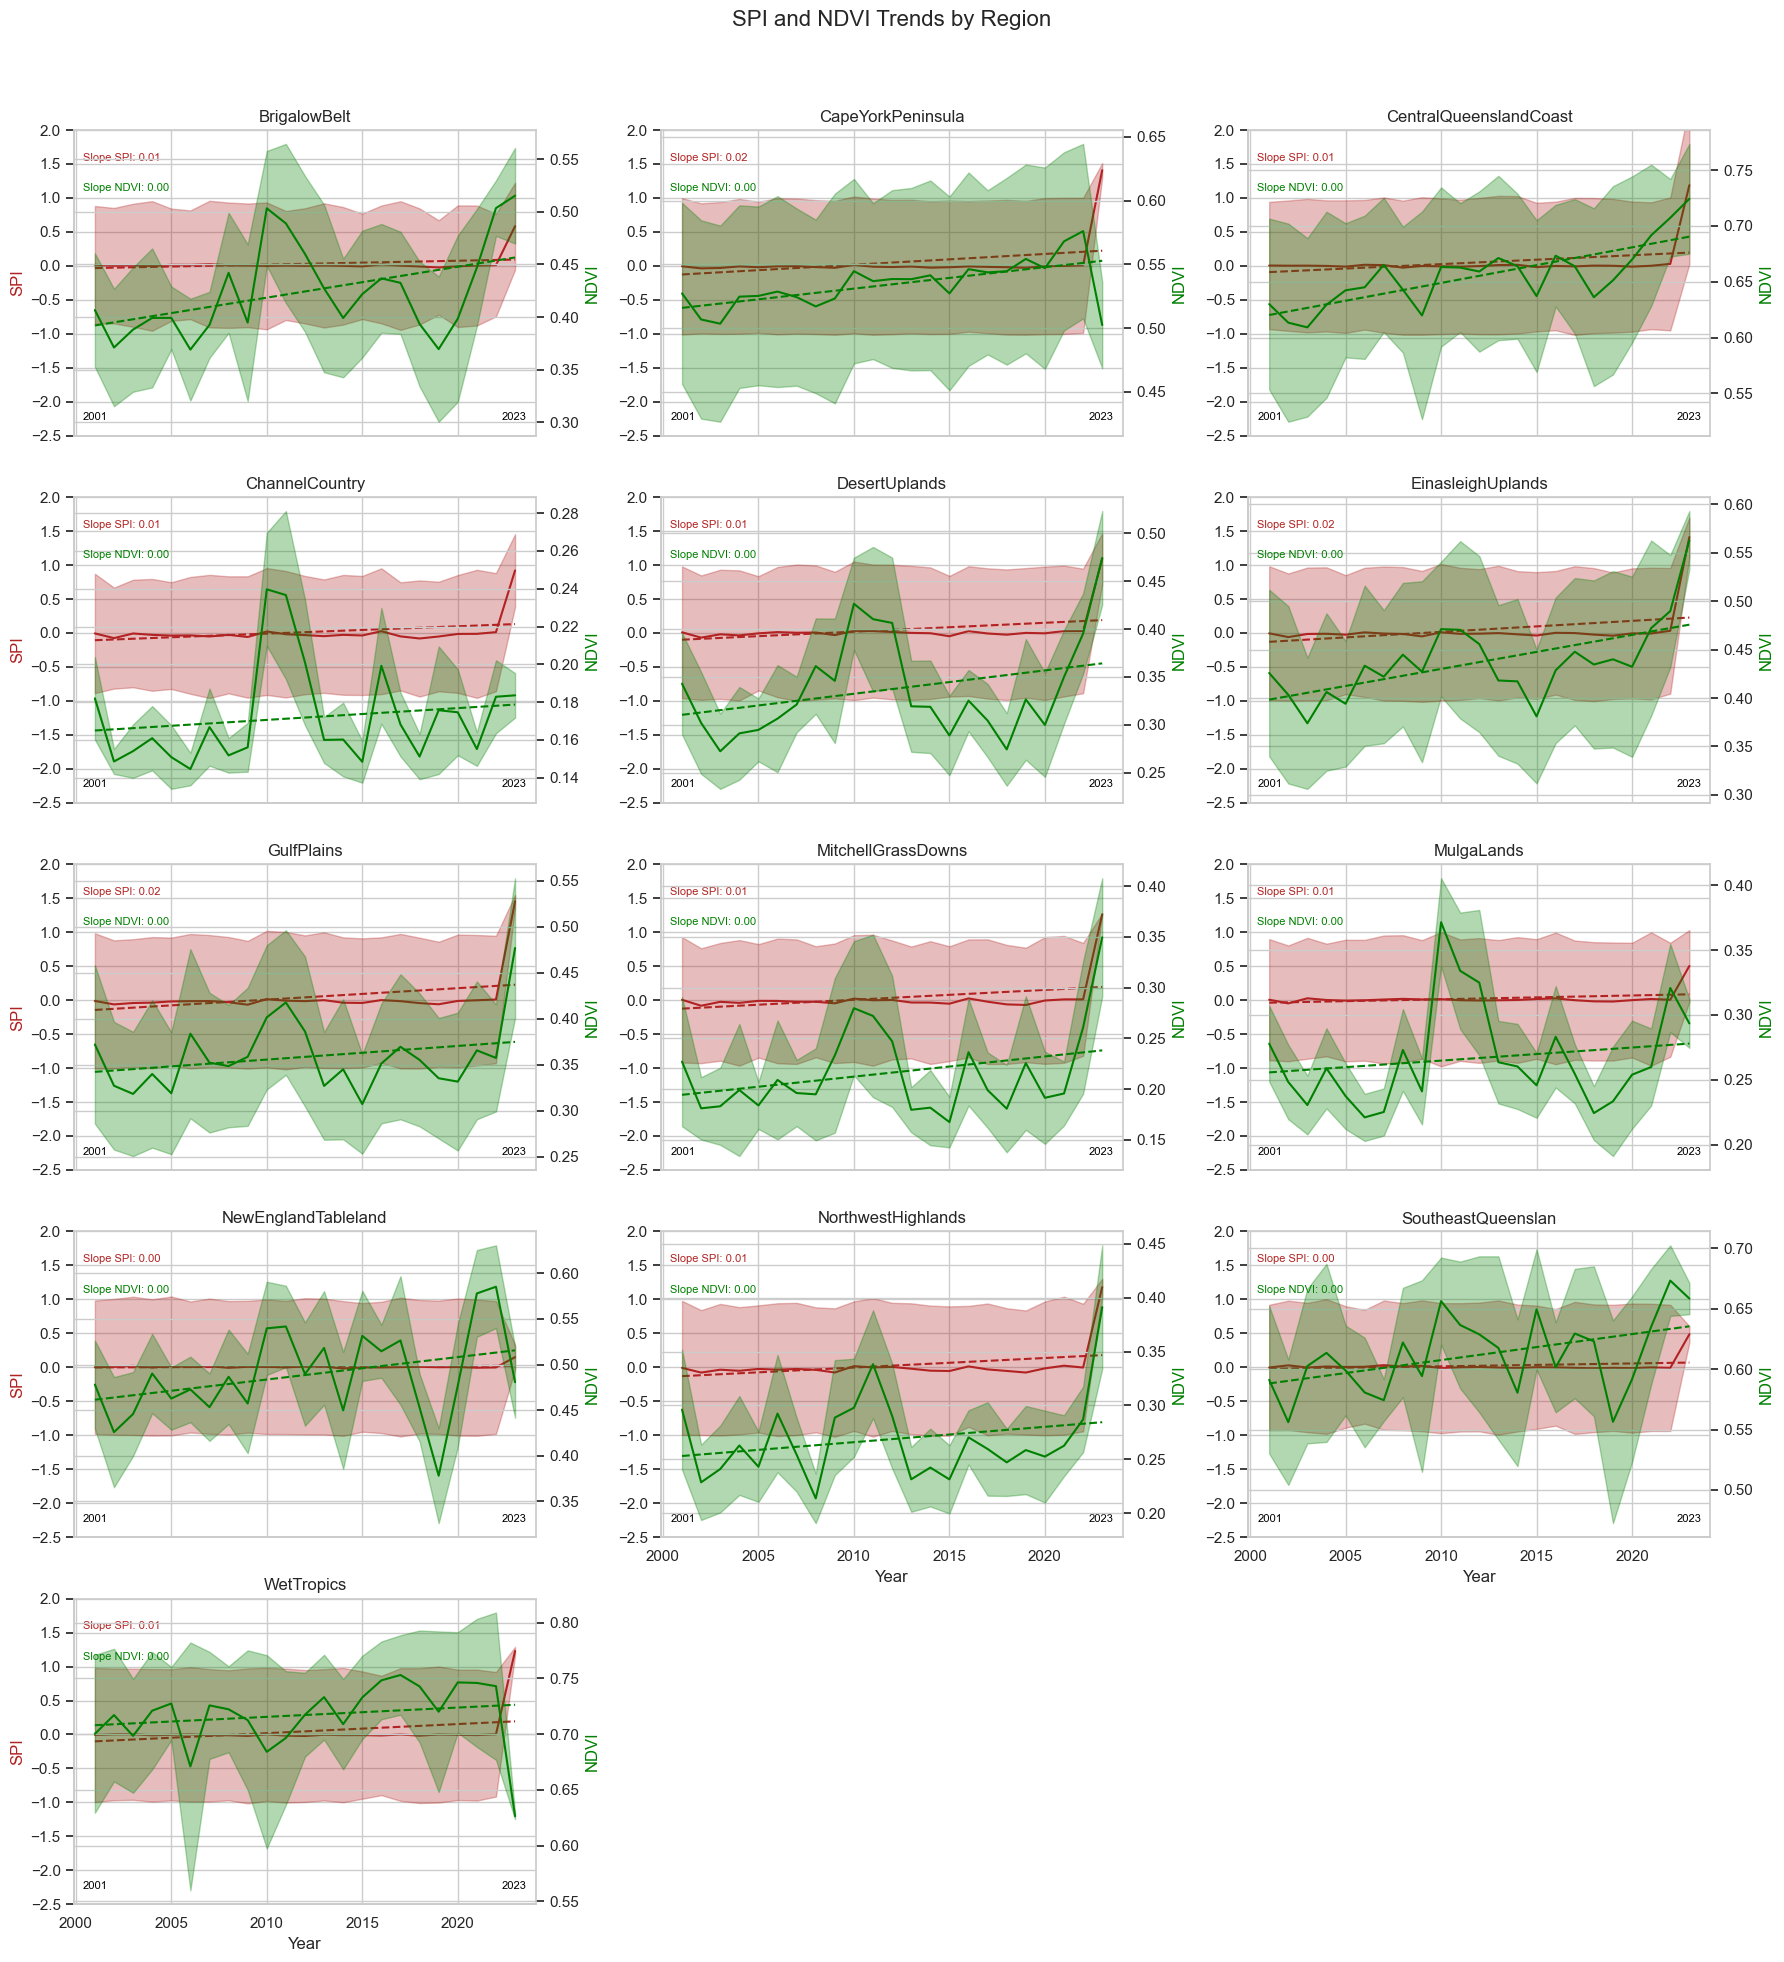

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_spi_ndvi_facets(df):
    sns.set(style="whitegrid")

    # Convert and extract year from Date
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year

    # Group SPI and NDVI by Region and Year
    grouped = df.groupby(['Region_Name', 'Year'])[['SPI', 'NDVI']].agg(['mean', 'std']).reset_index()
    grouped.columns = ['Region_Name', 'Year', 'SPI_mean', 'SPI_std', 'NDVI_mean', 'NDVI_std']

    # Set up FacetGrid with 3 columns per row and wider width
    g = sns.FacetGrid(grouped, col='Region_Name', col_wrap=3, height=4, aspect=1.5, sharey=False)

    def plot_panel(data, **kwargs):
        ax = plt.gca()
        x = data['Year']

        # SPI Plot (Red)
        ax.plot(x, data['SPI_mean'], color='firebrick', label='SPI')
        ax.fill_between(x, data['SPI_mean'] - data['SPI_std'], data['SPI_mean'] + data['SPI_std'],
                        color='firebrick', alpha=0.3)
        z_spi = np.polyfit(x, data['SPI_mean'], 1)
        p_spi = np.poly1d(z_spi)
        ax.plot(x, p_spi(x), color='firebrick', linestyle='--')
        ax.text(0.02, 0.90, f"Slope SPI: {z_spi[0]:.2f}", transform=ax.transAxes, fontsize=8, color='firebrick')

        # NDVI Plot (Green) - use secondary axis
        ax2 = ax.twinx()
        ax2.plot(x, data['NDVI_mean'], color='green', label='NDVI')
        ax2.fill_between(x, data['NDVI_mean'] - data['NDVI_std'], data['NDVI_mean'] + data['NDVI_std'],
                         color='green', alpha=0.3)
        z_ndvi = np.polyfit(x, data['NDVI_mean'], 1)
        p_ndvi = np.poly1d(z_ndvi)
        ax2.plot(x, p_ndvi(x), color='green', linestyle='--')
        ax2.text(0.02, 0.80, f"Slope NDVI: {z_ndvi[0]:.2f}", transform=ax.transAxes, fontsize=8, color='green')

        # Mark start and end year explicitly
        start_year = int(x.min())
        end_year = int(x.max())
        ax.text(0.02, 0.05, f"{start_year}", transform=ax.transAxes, fontsize=8, color='black', ha='left')
        ax.text(0.98, 0.05, f"{end_year}", transform=ax.transAxes, fontsize=8, color='black', ha='right')

        ax.set_ylim(-2.5, 2)
        ax.set_ylabel("SPI", color='firebrick')
        ax2.set_ylabel("NDVI", color='green')

    g.map_dataframe(plot_panel)
    g.set_titles("{col_name}")
    g.set_axis_labels("Year", "SPI")

    # Adjust layout
    g.tight_layout()
    plt.subplots_adjust(top=0.92)

    # Center align the last row if it has fewer than 3 plots
    n_col = 3
    n_total = len(grouped['Region_Name'].unique())
    n_rows = (n_total + n_col - 1) // n_col
    for ax_idx, ax in enumerate(g.axes.flat):
        if ax_idx >= n_total:
            ax.remove()
    if n_total % n_col != 0:
        empty_plots = n_col - (n_total % n_col)
        fig = g.fig
        for _ in range(empty_plots):
            fig.add_subplot(n_rows, n_col, n_total + _ + 1).axis('off')

    g.fig.suptitle("SPI and NDVI Trends by Region", fontsize=16)
    plt.show()

# Call the function
plot_spi_ndvi_facets(df)
